# A demo of the Spectral Biclustering algorithm


In [ ]:
from matplotlib import pyplot as plt
from sklearn.datasets import make_checkerboard

n_clusters = (4, 3)

# 生成一个带有双聚类结构的矩阵
data, rows, columns = make_checkerboard(
    shape=(
        300,
        300,
    ),  # 表示创建一个 300 行 300 列的矩阵。
    n_clusters=n_clusters,  # 把行和列分别平均分成 4 组和 3 组
    noise=10,  # 在生成的棋盘结构中加入多少“扰动”或“随机性”
    shuffle=False,  # 表示是否打乱行和列的顺序
    random_state=42,  # 随机种子
)

print(data.shape)
print(rows)
print(columns)

(300, 300)
[[ True  True  True ... False False False]
 [ True  True  True ... False False False]
 [ True  True  True ... False False False]
 ...
 [False False False ...  True  True  True]
 [False False False ...  True  True  True]
 [False False False ...  True  True  True]]
[[ True  True  True ... False False False]
 [False False False ... False False False]
 [False False False ...  True  True  True]
 ...
 [ True  True  True ... False False False]
 [False False False ... False False False]
 [False False False ...  True  True  True]]


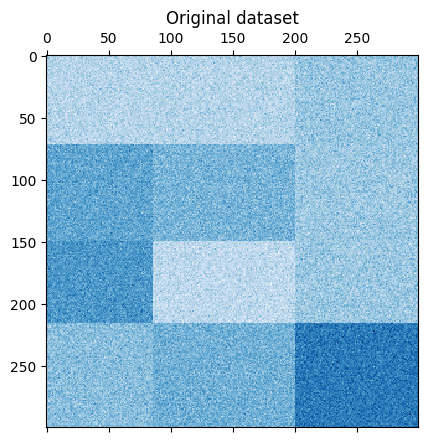

In [ ]:
plt.matshow(data, cmap=plt.cm.Blues)
plt.title("Original dataset")
plt.show()

In [17]:
import numpy as np

# Creating lists of shuffled row and column indices
rng = np.random.RandomState(0)
row_idx_shuffled = rng.permutation(data.shape[0])
col_idx_shuffled = rng.permutation(data.shape[1])

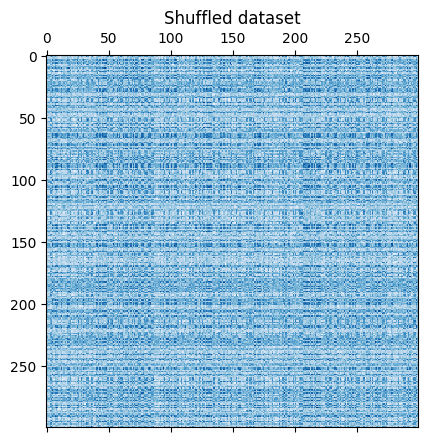

In [18]:
data = data[row_idx_shuffled][:, col_idx_shuffled]

plt.matshow(data, cmap=plt.cm.Blues)
plt.title("Shuffled dataset")
plt.show()

In [19]:
from sklearn.cluster import SpectralBiclustering
from sklearn.metrics import consensus_score

model = SpectralBiclustering(n_clusters=n_clusters, method="log", random_state=0)
model.fit(data)

# Compute the similarity of two sets of biclusters
score = consensus_score(
    model.biclusters_, (rows[:, row_idx_shuffled], columns[:, col_idx_shuffled])
)
print(f"consensus score: {score:.1f}")

consensus score: 1.0


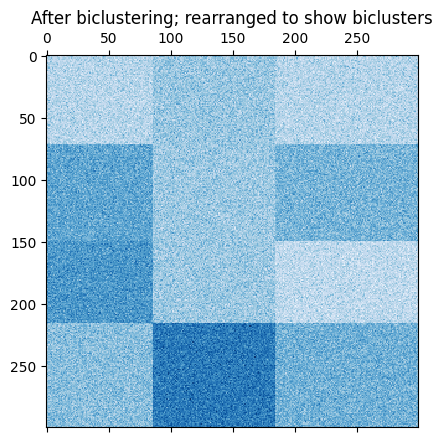

In [20]:
# Reordering first the rows and then the columns.
reordered_rows = data[np.argsort(model.row_labels_)]
reordered_data = reordered_rows[:, np.argsort(model.column_labels_)]

plt.matshow(reordered_data, cmap=plt.cm.Blues)
plt.title("After biclustering; rearranged to show biclusters")
plt.show()

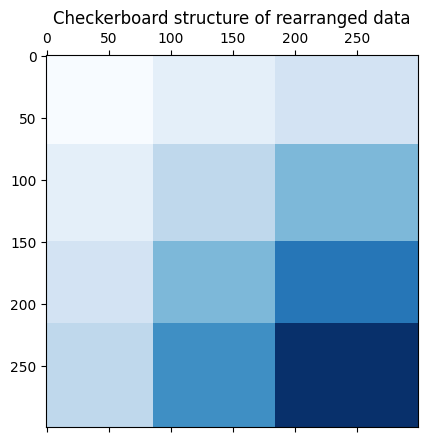

In [21]:
plt.matshow(
    np.outer(np.sort(model.row_labels_) + 1, np.sort(model.column_labels_) + 1),
    cmap=plt.cm.Blues,
)
plt.title("Checkerboard structure of rearranged data")
plt.show()